In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import geopandas as gpd
import multiprocessing as mp

In [2]:
#データソース:https://nlftp.mlit.go.jp/ksj/gml/datalist/KsjTmplt-N03-v3_1.html#prefecture00
dfborder=gpd.read_file("/home/takato/shpfile/japanborders/N03-22_220101.shp",encoding="shift-jis")

## 愛知県の市町村境界をプロット

In [76]:
dfaichi=dfborder[dfborder["N03_001"]=="愛知県"]
dfaichi=dfaichi.to_crs(4326)

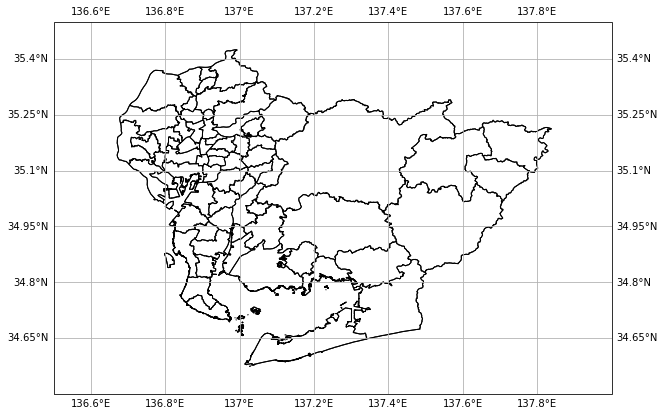

In [84]:

fig,ax=plt.subplots(1,1,subplot_kw={"projection":ccrs.PlateCarree()}, figsize=(10,10))
ax.add_geometries(dfaichi["geometry"], crs=ccrs.PlateCarree(),facecolor="None",edgecolor="black")
ax.gridlines(draw_labels=True)
ax.set_extent([136.5,138,34.5,35.5])


## 都道府県境界shpファイルを作成

### 都道府県別に集約していく

In [3]:
pref_list=dfborder["N03_001"].unique()
pref_list

array(['北海道', '青森県', '岩手県', '宮城県', '秋田県', '山形県', '福島県', '茨城県', '栃木県',
       '群馬県', '埼玉県', '千葉県', '東京都', '神奈川県', '新潟県', '富山県', '石川県', '福井県',
       '山梨県', '長野県', '岐阜県', '静岡県', '愛知県', '三重県', '滋賀県', '京都府', '大阪府',
       '兵庫県', '奈良県', '和歌山県', '鳥取県', '島根県', '岡山県', '広島県', '山口県', '徳島県',
       '香川県', '愛媛県', '高知県', '福岡県', '佐賀県', '長崎県', '熊本県', '大分県', '宮崎県',
       '鹿児島県', '沖縄県'], dtype=object)

In [4]:
def main(it):
    pref=pref_list[it]
    dftmp=dfborder[dfborder["N03_001"]==pref]
    dftmp=dftmp.dissolve(by="N03_001")
    dftmp.to_file(f"/home/takato/shpfile/japanprefborders/{pref}.shp",encoding="shift-jis")
    del dftmp
    print(pref, "end")
    return 0

In [5]:
if __name__=="__main__":
    pool=mp.Pool(6)
    pool.map(main, range(len(pref_list)))
    pool.close()

埼玉県 end
栃木県 end
群馬県 end
福島県 end
秋田県 end
山形県 end
茨城県 end
東京都 end
千葉県 end
山梨県 end
長野県 end
岐阜県 end
神奈川県 end
愛知県 end
新潟県 end
石川県 end
富山県 end
滋賀県 end
京都府 end
大阪府 end
福井県 end
奈良県 end
兵庫県 end
鳥取県 end
和歌山県 end
静岡県 end
岡山県 end
三重県 end
広島県 end
香川県 end
山口県 end
高知県 end
徳島県 end
佐賀県 end
福岡県 end
愛媛県 end
熊本県 end
大分県 end
宮崎県 end
島根県 end
沖縄県 end
長崎県 end
鹿児島県 end
岩手県 end
北海道 end
青森県 end
宮城県 end


### 47都道府県くっつける

In [7]:
import glob
shpfiles=glob.glob("/home/takato/shpfile/japanprefborders/*.shp")
dflist=[]
for f in shpfiles:
    print(f)
    tmp=gpd.read_file(f,encoding="shift-jis")
    dflist.append(tmp)
dfpref=pd.concat(dflist)
dfpref.head()

/home/takato/shpfile/japanprefborders/長野県.shp
/home/takato/shpfile/japanprefborders/沖縄県.shp
/home/takato/shpfile/japanprefborders/青森県.shp
/home/takato/shpfile/japanprefborders/福島県.shp
/home/takato/shpfile/japanprefborders/東京都.shp
/home/takato/shpfile/japanprefborders/山口県.shp
/home/takato/shpfile/japanprefborders/静岡県.shp
/home/takato/shpfile/japanprefborders/千葉県.shp
/home/takato/shpfile/japanprefborders/大分県.shp
/home/takato/shpfile/japanprefborders/岩手県.shp
/home/takato/shpfile/japanprefborders/岐阜県.shp
/home/takato/shpfile/japanprefborders/神奈川県.shp
/home/takato/shpfile/japanprefborders/三重県.shp
/home/takato/shpfile/japanprefborders/奈良県.shp
/home/takato/shpfile/japanprefborders/山形県.shp
/home/takato/shpfile/japanprefborders/島根県.shp
/home/takato/shpfile/japanprefborders/山梨県.shp
/home/takato/shpfile/japanprefborders/滋賀県.shp
/home/takato/shpfile/japanprefborders/高知県.shp
/home/takato/shpfile/japanprefborders/愛媛県.shp
/home/takato/shpfile/japanprefborders/佐賀県.shp
/home/takato/shpfile/japanprefbor

,N03_001,N03_002,N03_003,N03_004,N03_007,geometry
0,長野県,None,南佐久郡,長野市,20201,"POLYGON ((137.57501 35.31698, 137.57528 35.317..."
0,沖縄県,None,国頭郡,那覇市,47201,"MULTIPOLYGON (((123.78781 24.07158, 123.78788 ..."
0,青森県,None,東津軽郡,青森市,02201,"MULTIPOLYGON (((139.93737 40.42950, 139.93737 ..."
0,福島県,None,伊達郡,福島市,07201,"MULTIPOLYGON (((140.95177 36.96055, 140.95177 ..."
0,東京都,None,西多摩郡,千代田区,13101,"MULTIPOLYGON (((153.97332 24.28909, 153.97332 ..."


### プロット

In [42]:
#投影法を正距円筒図法にする
dfepsg=dfpref.to_crs(epsg=4326)

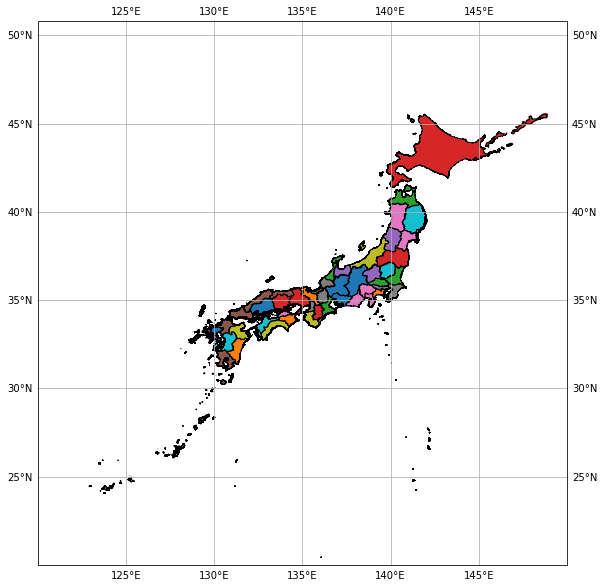

In [49]:
fig,ax=plt.subplots(1,1,subplot_kw={"projection":ccrs.PlateCarree()}, figsize=(10,10))
for i,pref in enumerate(dfpref["N03_001"].unique()):
    cnum=i%10
    color=f"C{cnum}"
    tmp=dfepsg[dfepsg["N03_001"]==pref]
    ax.add_geometries(tmp["geometry"], crs=ccrs.PlateCarree(),facecolor=color,edgecolor="black")
ax.gridlines(draw_labels=True)
ax.set_extent([120,150,20,50])